# XAI for Breast Cancer Prediction


We first develop a SVM for prediction of breast tumors response to Neoadjuvant chemotherapy and then use XAI method known as SHAP to explore the importance of features in our prediction. 

In [3]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as pl
import matplotlib.pyplot as plt 
%matplotlib inline 
dataO  = pd.read_table("D:/MultiOmics/Data/AllData2.txt")

dataO.head()

,Trial.ID,cin,purity,ploidy,n_total,fraction_cancer,fraction_lymph,fraction_stromal,median_cancer_KDE_knn_50,median_lymph_KDE_knn_50,...,Signature.30,Unknown,NumberMutationsAnalysed,iC10,Stage,LNStatus,ER,HER2,PAM50,Response
0,T001,0.265233,0.75,3.6,225937,0.61,0.11,0.28,-2.965641,-3.800723,...,0,0.104755,158,5,2,NEG,POS,POS,Her2,RD
1,T002,0.421997,0.19,2.1,205031,0.38,0.18,0.44,-3.079519,-3.452945,...,0,0.170971,129,10,4,POS,POS,POS,Basal,pCR
2,T003,0.333721,0.52,3.4,189418,0.36,0.28,0.36,-3.075506,-3.221692,...,0,0.186271,98,9,2,NEG,POS,POS,LumB,pCR
3,T004,0.507514,0.33,3.6,132349,0.50,0.21,0.30,-3.042013,-3.347756,...,0,0.130251,110,10,3,NEG,POS,POS,Basal,RD
4,T005,0.377768,0.59,3.5,119075,0.60,0.16,0.24,-2.942177,-3.661603,...,0,0.084230,108,6,3,POS,POS,POS,LumB,RD


In [5]:
data= dataO
#data.to_csv('E:/Dropbox (UiO)/Validation/0Code/All-1560/AllData.csv') 

resp = {'pCR': 1,'RD': 0}
data.Response = [resp[item] for item in data.Response]

er = {'POS': 1,'NEG': 0}
data.ER  = [er[item] for item in data.ER ]
data.HER2  = [er[item] for item in data.HER2 ]
data.LNStatus  = [er[item] for item in data.LNStatus ]

categorical_cols = ['PAM50']  
data = pd.get_dummies(data, columns = categorical_cols) 
data.shape
data.to_csv('D:/MultiOmics/Data/FeatVal.csv') 

In [14]:
data.head()

,Trial.ID,cin,purity,ploidy,n_total,fraction_cancer,fraction_lymph,fraction_stromal,median_cancer_KDE_knn_50,median_lymph_KDE_knn_50,...,Signature.30,Unknown,NumberMutationsAnalysed,iC10,Stage,LNStatus,ER,HER2,PAM50,Response
0,T001,0.265233,0.75,3.6,225937,0.61,0.11,0.28,-2.965641,-3.800723,...,0,0.104755,158,5,2,0,1,1,Her2,0
1,T002,0.421997,0.19,2.1,205031,0.38,0.18,0.44,-3.079519,-3.452945,...,0,0.170971,129,10,4,1,1,1,Basal,1
2,T003,0.333721,0.52,3.4,189418,0.36,0.28,0.36,-3.075506,-3.221692,...,0,0.186271,98,9,2,0,1,1,LumB,1
3,T004,0.507514,0.33,3.6,132349,0.50,0.21,0.30,-3.042013,-3.347756,...,0,0.130251,110,10,3,0,1,1,Basal,0
4,T005,0.377768,0.59,3.5,119075,0.60,0.16,0.24,-2.942177,-3.661603,...,0,0.084230,108,6,3,1,1,1,LumB,0


# Preprocessing 

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
X= pd.DataFrame(data.drop(['Trial.ID', 'Response' ], axis=1)) 
d3= pd.DataFrame(data.drop(['Trial.ID',  'Response'], axis=1))  
y= data['Response']
from sklearn import preprocessing
X = pd.DataFrame(preprocessing.StandardScaler().fit(X).transform(X), columns =d3.columns)
X.shape 

(149, 93)

#  Test Train

In [26]:
#   Import necessary ML packages
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Split into training/testing datasets using Train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3333,random_state=10)#
#X_train, y_train = X,y 
#X_test, y_test = X,y 
#X_train,X_test,y_train,y_test= np.asarray(X_train), np.asarray(X_test), np.asarray(y_train), np.asarray(y_test)
print ('Train set:', X_train.shape,y_train.shape)
print ('Test set: ', X_test.shape, y_test.shape)

Train set: (99, 93) (99,)
Test set:  (50, 93) (50,)


# Support Vector Machine

GridSearch

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
from sklearn.model_selection import StratifiedKFold


# defining parameter range
param_grid = {'C':1.5**np.arange(-30,10,1), 
               'gamma':1.5**np.arange(-30,10,1),
              'kernel': [  'rbf','linear','rbf','poly', 'sigmoid']}   ###

 

kfold = StratifiedKFold(n_splits=25, shuffle=True, random_state=0)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3333)#

grid = GridSearchCV(SVC(class_weight='balanced'), param_grid,scoring='roc_auc',  verbose =0,cv=5)
  
# fitting the model for grid search
grid.fit(X_train, y_train)
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [ ]:
X_train, y_train = X,y 
X_test, y_test = X,y
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

clf =   svm.SVC(C=1,gamma=0.02,kernel='rbf',probability=True, class_weight='balanced')  # 

clf.fit(X_train,y_train)

yhatSVM = clf.predict(X_test)

svmaccu = accuracy_score(y_test, yhatSVM)
svmf1 = f1_score (y_test, yhatSVM)
auc = roc_auc_score(y_test, yhatSVM)

print("Support Vector Machines are ", svmaccu*100, "accurate")
print("SVM  f1 score is", svmf1)
print("SVM  AUC score is", auc)

Support Vector Machines are  94.63087248322147 accurate
SVM  f1 score is 0.9090909090909091
SVM  AUC score is 0.963302752293578


 # SHAP Analysis

In [ ]:
!pip install shap
import shap


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
clf.fit(X,y)
svm_explainer = shap.KernelExplainer(clf.predict,X)
svm_shap_values = svm_explainer.shap_values(X)

X does not have valid feature names, but SVC was fitted with feature names
Using 149 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/149 [00:00<?, ?it/s]

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  1%|          | 1/149 [00:06<16:46,  6.80s/it]X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize'

In [ ]:
svm_shap= pd.DataFrame(svm_shap_values,columns=d3.columns)
svm_shap.to_csv('D:/MultiOmics/Code/ShapVal.csv') 

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


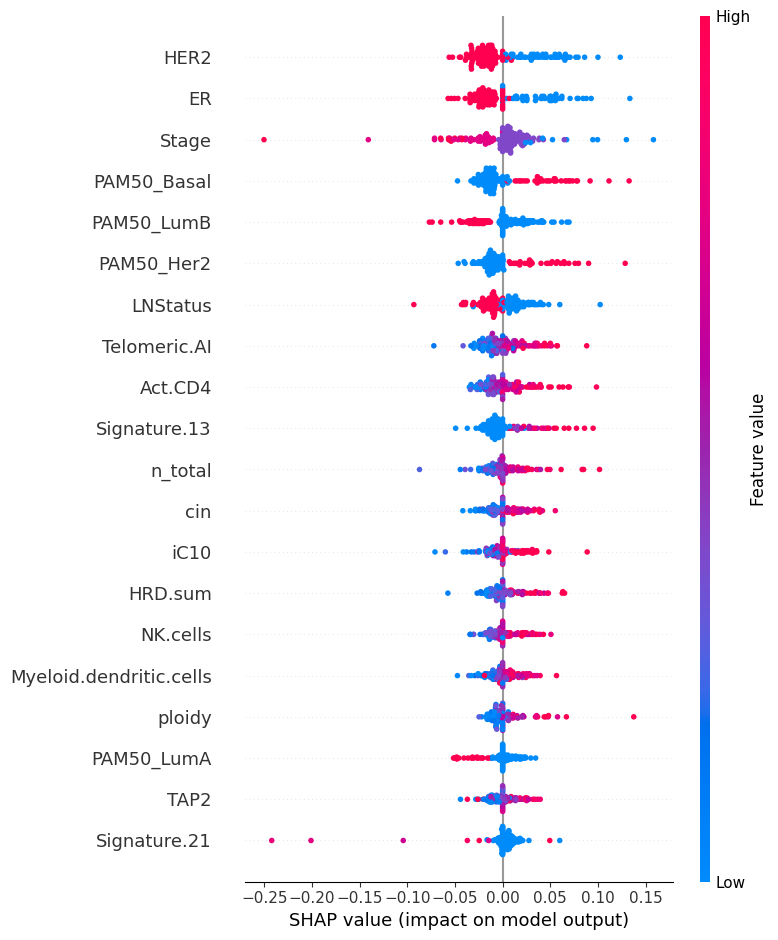

In [ ]:
shap.summary_plot(svm_shap_values, X,feature_names=d3.columns)

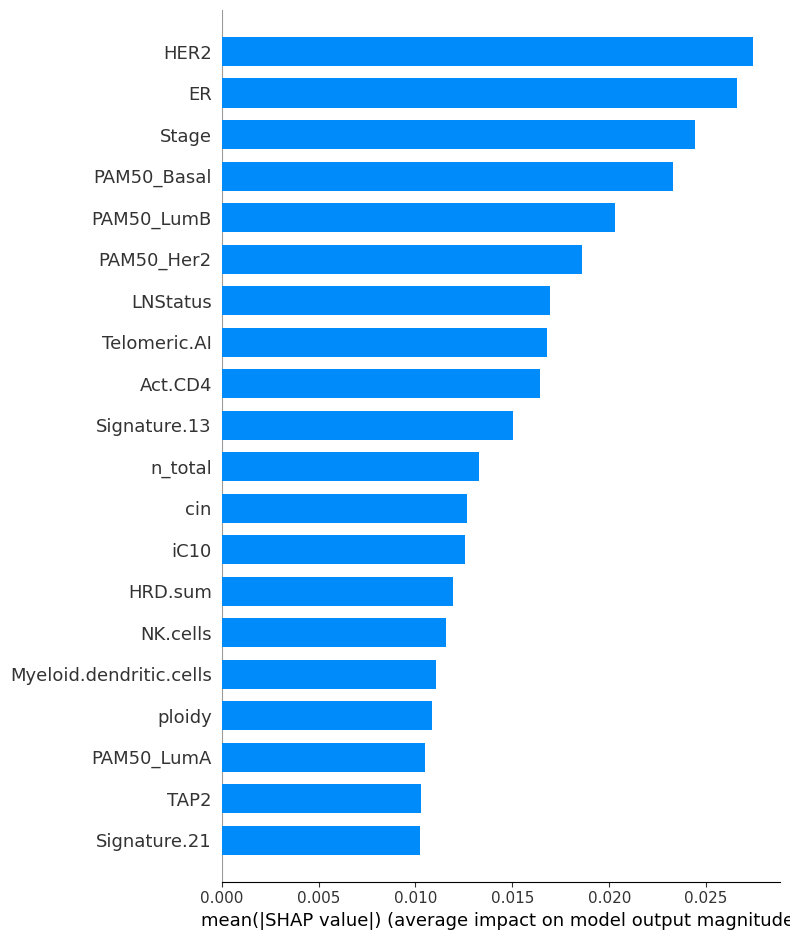

In [ ]:
shap.summary_plot(svm_shap_values, X, feature_names=d3.columns, plot_type="bar")